<a href="https://colab.research.google.com/github/Mikaner/reinforcement/blob/main/maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

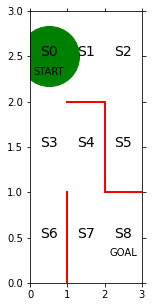

In [2]:
fig = plt.figure(figsize=(2,5))
ax = plt.gca()

# draw red wall
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0~S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='off', right='off', left='off', labelleft='off')

# draw green circle for S0
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0~7, 列は移動方向で↑，→，↓，←を指す
theta_0 = np.array([[np.nan,      1,      1, np.nan], # S0
                    [np.nan,      1, np.nan,      1], # S1
                    [np.nan, np.nan,      1,      1], # S2
                    [     1,      1,      1, np.nan], # S3
                    [np.nan, np.nan,      1,      1], # S4
                    [     1, np.nan, np.nan, np.nan], # S5
                    [     1, np.nan, np.nan, np.nan], # S6
                    [     1,      1, np.nan, np.nan], # S7 ※S8はゴールなので方策なし
                    ])


In [4]:
# 方策パラメータthetaを行動方針piに変換する関数の定義
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''
    
    [m, n] = theta.shape
    print(theta.shape)
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        print(pi[i,:])

    pi = np.nan_to_num(pi)

    return pi

In [5]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

(8, 4)
[nan 0.5 0.5 nan]
[nan 0.5 nan 0.5]
[nan nan 0.5 0.5]
[0.33333333 0.33333333 0.33333333        nan]
[nan nan 0.5 0.5]
[ 1. nan nan nan]
[ 1. nan nan nan]
[0.5 0.5 nan nan]


array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [6]:
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        s_next = s-3
    elif next_direction == "right":
        s_next = s+1
    elif next_direction == "down":
        s_next = s+3
    elif next_direction == "left":
        s_next = s-1
    
    return s_next

In [7]:
def goal_maze(pi):
    s = 0
    state_history = [0]

    while(True):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)

        if next_s == 8:
            break
        else:
            s = next_s
        
    return state_history

In [8]:
state_history = goal_maze(pi_0)
print(state_history)
print("steps:", str(len(state_history)-1))

[0, 1, 2, 5, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 4, 3, 6, 3, 6, 3, 4, 3, 4, 7, 8]
steps: 24


In [9]:
from matplotlib import animation
from IPython.display import HTML

In [10]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

In [11]:
def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simple に割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

        print(pi[i,:])
    pi = np.nan_to_num(pi) # Nan → 0
    return pi

In [12]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[nan 0.5 0.5 nan]
[nan 0.5 nan 0.5]
[nan nan 0.5 0.5]
[0.33333333 0.33333333 0.33333333        nan]
[nan nan 0.5 0.5]
[ 1. nan nan nan]
[ 1. nan nan nan]
[0.5 0.5 nan nan]
[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [13]:
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1

    return [action, s_next]

In [14]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]

    while True:
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action

        s_a_history.append([next_s, np.nan])

        if next_s == 8:
            break
        else:
            s = next_s
    
    return s_a_history

In [15]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("Steps :", len(s_a_history)-1)

[[0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 0], [0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 2], [3, 0], [0, 2], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 3], [3, 2], [6, 0], [3, 0], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
Steps : 60


In [16]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

In [17]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history)

    [m, n] = theta.shape
    delta_theta = theta.copy()

    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]

                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta
    return new_theta

In [18]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[       nan 0.49959016 0.50040984        nan]
[       nan 0.49959016        nan 0.50040984]
[       nan        nan 0.49877049 0.50122951]
[0.33369654 0.33205943 0.33424403        nan]
[       nan        nan 0.49959016 0.50040984]
[ 1. nan nan nan]
[ 1. nan nan nan]
[0.49959016 0.50040984        nan        nan]
[[0.         0.49959016 0.50040984 0.        ]
 [0.         0.49959016 0.         0.50040984]
 [0.         0.         0.49877049 0.50122951]
 [0.33369654 0.33205943 0.33424403 0.        ]
 [0.         0.         0.49959016 0.50040984]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49959016 0.50040984 0.         0.        ]]
